# THE SPARKS FOUNDATION
## Data Science and Business Analytics
### GRIPSEPTEMBER23
### Name: Akash Das


### TASK #02 : PREDICTION USING UNSUPERVISED MACHINE LEARNING
#### DESCRIPTION : PREDICT THE OPTIUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY FROM GIVEN IRIS DATA SET

### What is Iris dataset?
* Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally called the **Iris dataset**.
<br>

* The Iris dataset contains four features, *length and width of petal and sepal*. The dataset contains **151** samples of three Iris  species named **'Iris Setosa', 'Iris Versicolor', 'Iris Virginica'**. This features are used to create a linear model to classify the species.

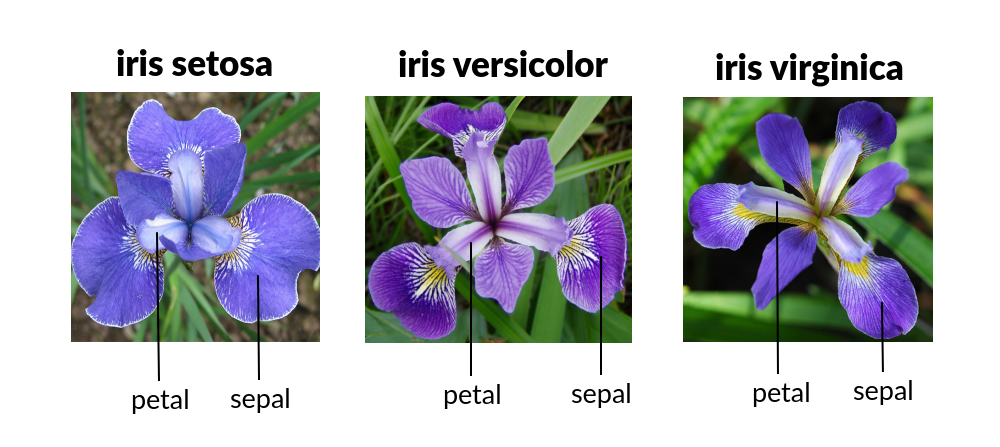

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Iris Dataset

In [3]:
path = "data/iris.csv"
iris_data = pd.read_csv(path)

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


###### There are three species of Iris flower each 50 sets

In [6]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Iris Data Visualization and Analysis

#### Analysis of sepal and petal length and width

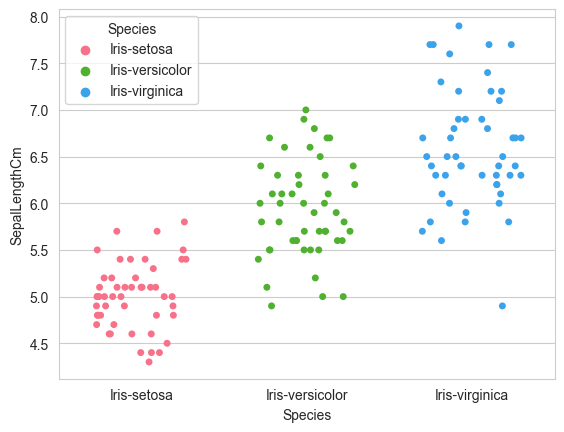

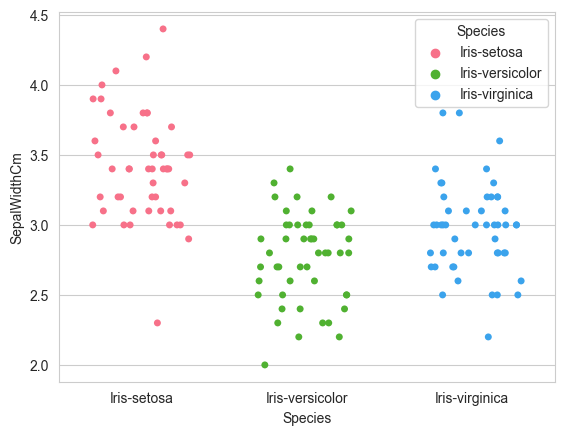

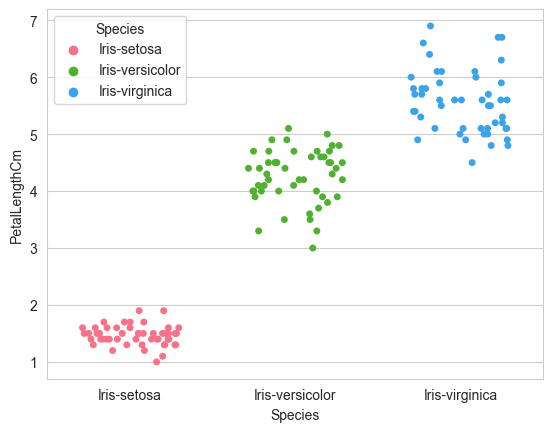

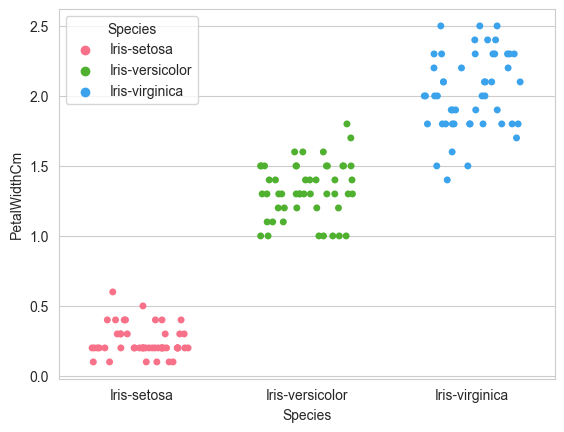

In [8]:
sns.set_style("whitegrid")
sepal_length = sns.stripplot(y = 'SepalLengthCm', x = 'Species', data = iris_data, hue='Species', palette='husl', jitter=0.3)
plt.show()

sepal_width = sns.stripplot(y = 'SepalWidthCm', x = 'Species', data = iris_data, hue='Species', palette='husl', jitter=0.3)
plt.show()

petal_length = sns.stripplot(y = 'PetalLengthCm', x = 'Species', data = iris_data, hue='Species', palette='husl', jitter=0.3)
plt.show()

petal_width = sns.stripplot(y = 'PetalWidthCm', x = 'Species', data = iris_data, hue='Species', palette='husl', jitter=0.3)
plt.show()

## Visualization between sepal length and sepal width of three species
#### How does the sepal length and width of an iris flower determine its specie?

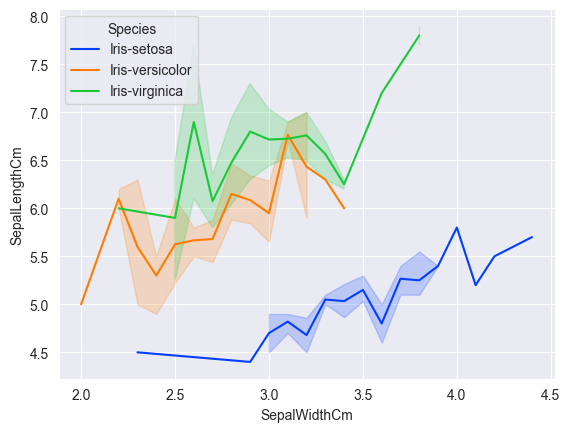

In [9]:
sns.set_style("darkgrid")
sns.lineplot(y='SepalLengthCm', x='SepalWidthCm', data = iris_data, hue='Species', palette = 'bright');

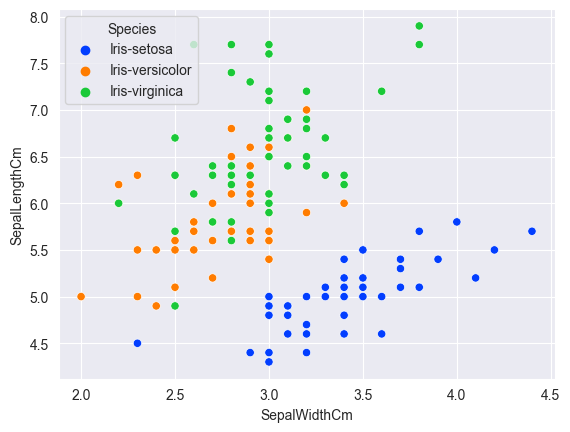

In [10]:
sns.scatterplot(y='SepalLengthCm', x='SepalWidthCm', data = iris_data, hue='Species', palette = 'bright');

## Visualization between petal length and petal width of three species
#### How does the petal length and width of an iris flower determine its specie?

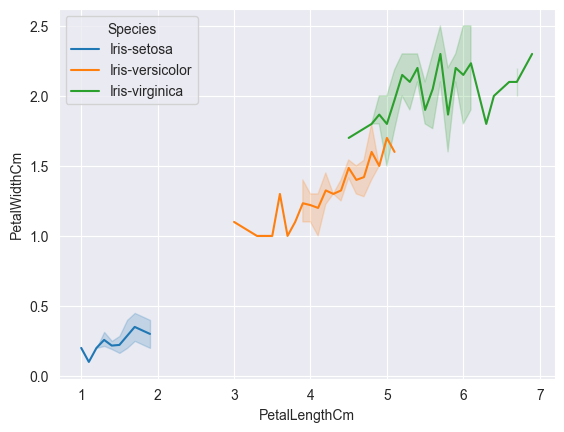

In [11]:
sns.lineplot(x='PetalLengthCm', y='PetalWidthCm', data = iris_data, hue='Species');

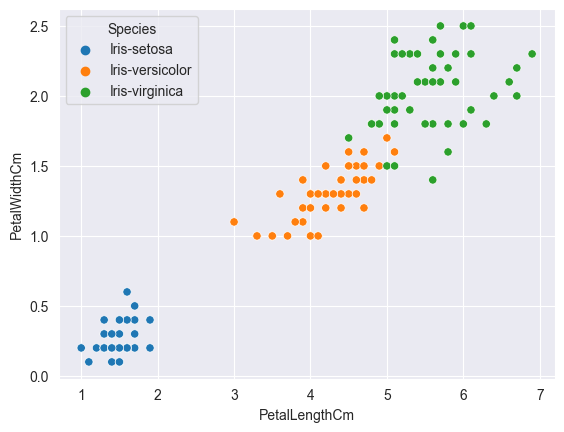

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data = iris_data, hue='Species');

## Linear relationship between sepal length and sepal width

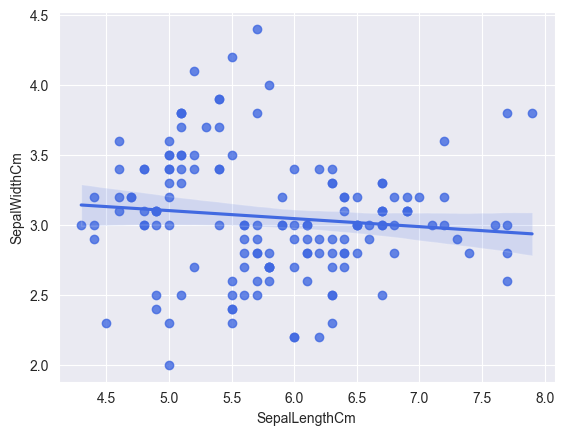

In [13]:
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data = iris_data, color='royalblue');

## K-Means Clustering of Iris Dataset

### What is K-Means Clustering ?
* K-Means clustering is an unsupervised learning algorithm, which grouped the unlabeled data into clusters. Here **K** means number of clusters that need to be created. It allows to cluster the data present in the dataset and helps to find the number of different groups present in the dataset. It is a **centroid-based algorithm**, where each cluster is associated with a centroid

### Finding the optimum number of clusters for K-Mean classification

In [14]:
from sklearn.cluster import KMeans

iris_length_width = iris_data.iloc[:, [1, 2, 3, 4]].values

sum_of_sqr_in_cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(iris_length_width)
    sum_of_sqr_in_cluster.append(kmeans.inertia_)

### Using the **Elbow Method** to determine the optimal number of clusters for k-means clustering

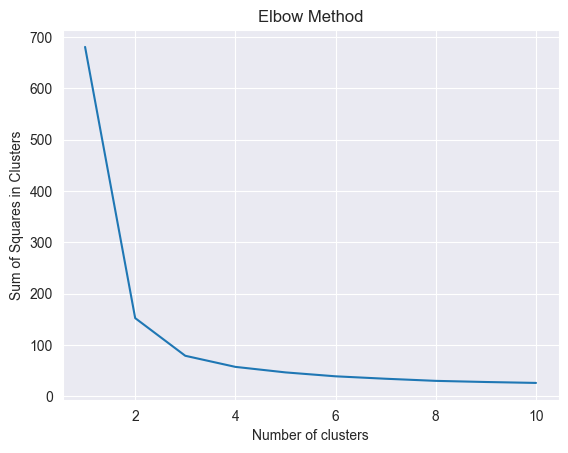

In [15]:
plt.plot(range(1, 11), sum_of_sqr_in_cluster)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares in Clusters')
plt.show()

Using above elbow method we find that the number of **centroids** in the cluster or value of **K** in K-Means cluster is **3**

## Applying K-Means

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
cluster_index = kmeans.fit_predict(iris_length_width)

#### Visualizing the clusters using scatter plot

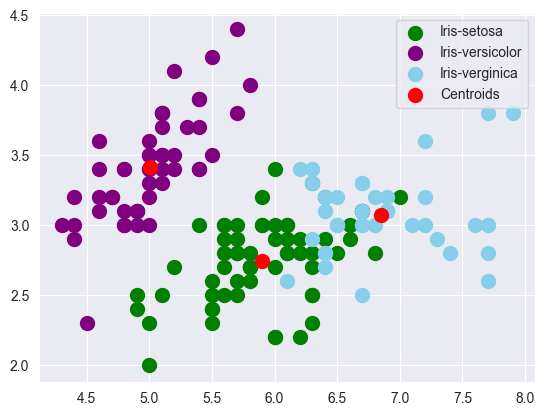

In [20]:
plt.scatter(iris_length_width[cluster_index==0, 0], iris_length_width[cluster_index==0, 1], s=100, c='green', label='Iris-setosa')
plt.scatter(iris_length_width[cluster_index==1, 0], iris_length_width[cluster_index==1, 1], s=100, c='purple', label='Iris-versicolor')
plt.scatter(iris_length_width[cluster_index==2, 0], iris_length_width[cluster_index==2, 1], s=100, c='skyblue', label='Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend();

#### Visualizing the clusters using 3D scatter plot

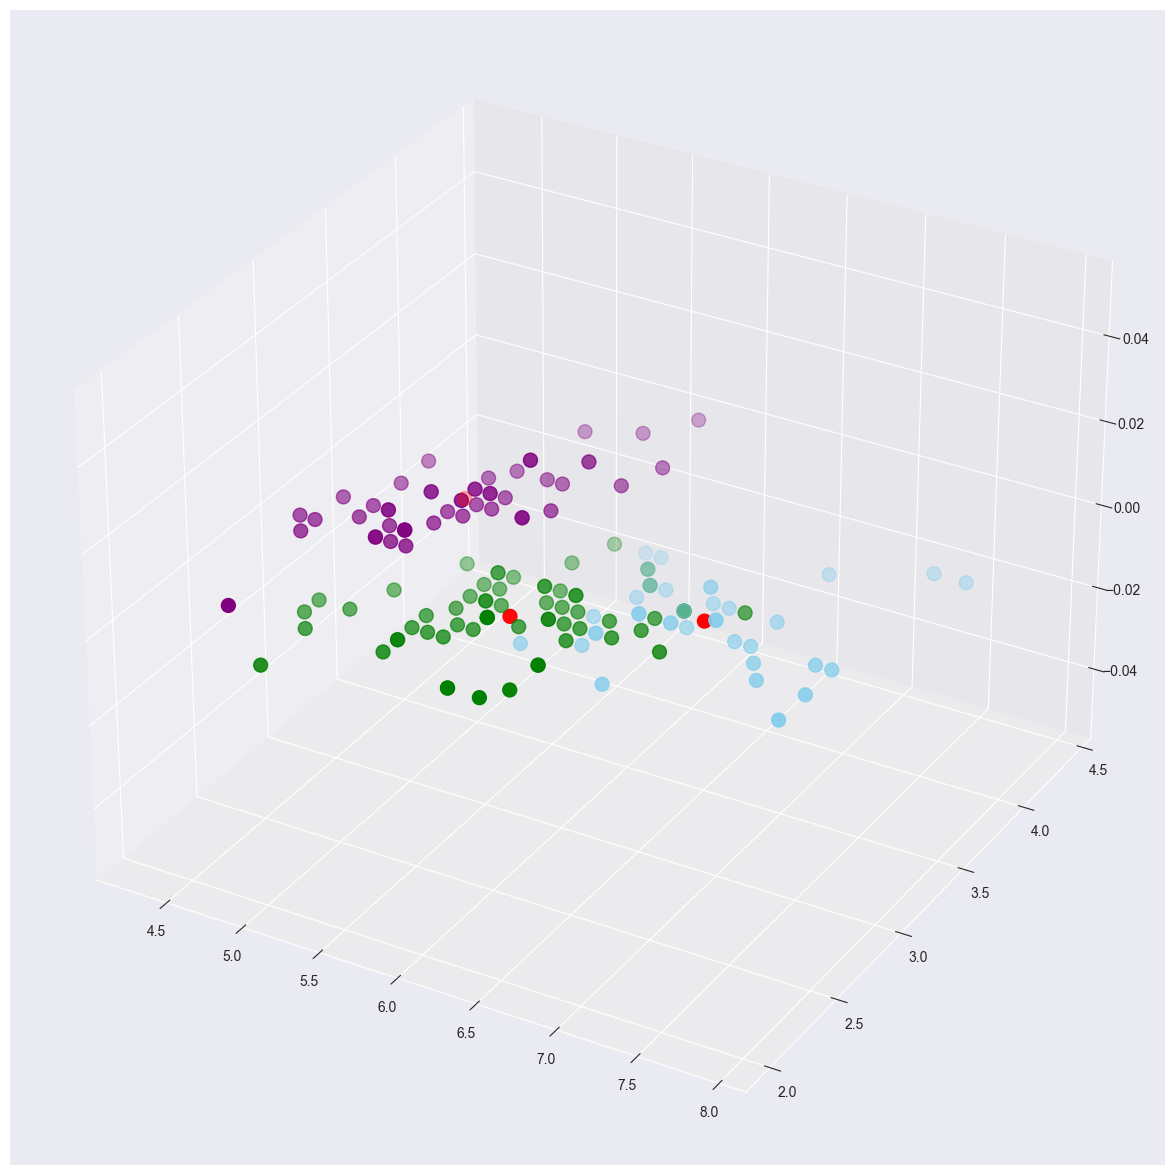

In [21]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')

plt.scatter(iris_length_width[cluster_index==0, 0], iris_length_width[cluster_index==0, 1], s=100, c='green', label='Iris-setosa')
plt.scatter(iris_length_width[cluster_index==1, 0], iris_length_width[cluster_index==1, 1], s=100, c='purple', label='Iris-versicolor')
plt.scatter(iris_length_width[cluster_index==2, 0], iris_length_width[cluster_index==2, 1], s=100, c='skyblue', label='Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show();

#### --- END ---